# Importing libraries:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset:

In [2]:
netflix=pd.read_csv("C:\\Users\\227475\\OneDrive\\Desktop\\Netflix Project\\netflixdata.csv")

# Exploratory Data Analysis:

In [ ]:
netflix

In [ ]:
netflix.head(3)

In [ ]:
netflix.tail(3)

In [26]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8793 non-null   object
 1   type          8793 non-null   object
 2   title         8793 non-null   object
 3   director      8793 non-null   object
 4   cast          8793 non-null   object
 5   country       8793 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8793 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8793 non-null   object
 10  genre         8793 non-null   object
 11  description   8793 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
print("Number of rows: ",netflix.shape[0])
print("Number of columns: ",netflix.shape[1])

In [ ]:
print("The 12 columns of our dataset are: \n")
for i in range(len(list(netflix.columns))):
    print(list(netflix.columns)[i])

In [ ]:
#Number of unique values present for each column

netflix.nunique()

In [ ]:
# The different values possible for "type" column

list(netflix['type'].unique())

In [ ]:
# The different types of ratings available

list(netflix['rating'].unique())

#### We see that the values '74 min', '84 min' and '66 min', seem to have been added faultily into the rating column instead of duration. We will fix this during data cleaning.

In [ ]:
# The different types of genres present

# Here we observe that the genre column has a lot of different combinations of genres presnt in a single cell, so we make a 
# neater list to display all the unique values of genres possible. 

genre_list  =  pd.unique(netflix.genre.str.split(",", expand =  True).stack())
for i  in range(len(genre_list)):
    genre_list[i] = genre_list[i].strip()

genre_list =  list(pd.unique(genre_list))
genre_list

In [ ]:
# Latest releases

lr=netflix[['title','release_year']]
lr[netflix['release_year']>=2021]

In [ ]:
# Oldest 5 Movies present on netflix

old=netflix[['title','release_year']]
old[netflix['type'] == 'Movie'].sort_values('release_year')[0:5]

In [ ]:
# Summary of null values present in the dataset. 

netflix.isnull().sum()

# Data Cleaning

### 1. We drop the rows which have null values for date added and rating added as they are only 10 and  in number.

In [5]:
print(netflix.shape[0])
fixda=netflix['date_added'].notna()
netflix=netflix[fixda]
print(netflix.shape[0])
fixrat=netflix['rating'].notna()
netflix=netflix[fixrat]
print(netflix.shape[0])

8807
8797
8793


#### We see that after dropping the 10 rows for date the number of rows goes from 8807 to 8797 and after futher droping the 3 rows for rating it goes to 8793.

### 2. For cast and director null cells, we put in "Unavailable".

In [6]:
netflix['cast'].replace(np.NaN, "Cast Unavailable", inplace = True)
netflix['director'].replace(np.NaN, "Director Unavailable", inplace=True)

### 3. We replace missing country values with the mode of column "country".

In [7]:
countrymode=netflix['country'].mode()
print(countrymode)
netflix['country']=netflix['country'].fillna(countrymode[0])

0    United States
Name: country, dtype: object


### 4. Fixing duration values wrongly added into ratings.

#### As we saw in the EDA stage, the values '74 min', '84 min' and '66 min' were added into the rating column instead of duration. We fix this using by filling the values from rating.

In [8]:
print(netflix.loc[5541].duration)
netflix.duration = netflix.rating.where(netflix.rating == '74 min', netflix.duration)
print(netflix.loc[5541].duration)
print(netflix.loc[5794].duration)
netflix.duration = netflix.rating.where(netflix.rating == '84 min', netflix.duration)
print(netflix.loc[5794].duration)
print(netflix.loc[5813].duration)
netflix.duration = netflix.rating.where(netflix.rating == '66 min', netflix.duration)
print(netflix.loc[5813].duration)

nan
74 min
nan
84 min
nan
66 min


#### All duration nan values get replaced by the corresponding rating values.

### 5. Replace faulty ratings values.

####  We replace the wrong values in rating column with the mode of rating column.

In [9]:
netflix['rating'].nunique()
ratemode=netflix['rating'].mode()
print(ratemode)
print("\nTotal number of unique rating values before cleaning: ",netflix['rating'].nunique())
netflix['rating'] = np.where(netflix['rating'].str.contains("min"), ratemode, netflix['rating'])
print("Total number of unique rating values after cleaning: ",netflix['rating'].nunique())

0    TV-MA
Name: rating, dtype: object

Total number of unique rating values before cleaning:  17
Total number of unique rating values after cleaning:  14


#### The number of unique values in ratings column goes from 17 to 14 because the 3 wrong values get replaced by the mean.

### 6. Results of Data Cleaning

In [10]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
dtype: int64

#### The dataset is now clean with no null or faulty value.

## Visualization

In [ ]:
# Pie chart depicting the ratio of values in "type" for overall dataset

typecol=netflix.groupby('type').count()
data=typecol.show_id
plt.pie(data, labels = typecol.index, radius=1, autopct='%2.2f%%', textprops={"fontsize":10}, wedgeprops={"edgecolor":"black"})
plt.title('Movies vs TV Shows', fontdict = {'size' : '14', 'fontweight' : 'bold'})
plt.show()


In [ ]:
ry=netflix['release_year'].value_counts()
ry.plot(kind='bar', figsize=(15, 5))
plt.xlabel("Release Year")
plt.ylabel("No. of Released Content")
plt.title("Year Wise Releases")
plt.gca().invert_xaxis()
plt.figure(figsize=(13,10))
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
plt.xticks(rotation=90)
plt.title("Year Wise Releases", fontsize=20)
sns.countplot(ax=ax, x=netflix['release_year'])
plt.show()

In [ ]:
compare=netflix.release_year>=2010
compare=netflix[compare]
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=0)
plt.title("Comparision of Type of Content Released post 2010", fontsize=10)
sns.countplot(ax=ax, x=compare['release_year'], hue=compare['type'])
plt.show()

In [ ]:

lincom=netflix[['type','release_year']]
lincom=lincom.rename(columns={"release_year": "Release Year"})
lincom=lincom.rename(columns={"type": "Type"})
lincom=lincom.groupby(['Release Year','Type']).value_counts().reset_index(name='Total Content')
lincom=lincom[lincom['Release Year']>=2010]
sns.catplot(data=lincom, x="Release Year", y="Total Content", hue='Type', kind='point', height=5).set_xticklabels(rotation=90)
plt.show()

In [ ]:
fig=px.line(lincom, x="Release Year", y="Total Content", color='Type',title='Trend of Content Type post')
fig.show()

In [ ]:
newdata=netflix.release_year>=2019
newdata=netflix[newdata]
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=0)
plt.title("Last 3 years Ratings comparision", fontsize=15)
sns.countplot(ax=ax, x=newdata['release_year'], hue=newdata['rating'])
plt.show()

typerate=newdata.groupby('rating').count()
data=typerate.show_id
plt.pie(data, labels = typerate.index, radius=1.5, autopct='%2.2f%%', textprops={"fontsize":8})
plt.title('Rating-wise Distribution', fontdict = {'size' : '14', 'fontweight' : 'bold'}, pad=50)
my_circle=plt.Circle( (0,0), 1, color='white') 
p=plt.gcf()
p.gca().add_patch(my_circle)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Top 10 Countries with Most Content", fontsize=15)                                               
netflix["country"].value_counts().head(10).plot(kind="barh",color="green")     
plt.xlabel("Number of Releases")
plt.ylabel("Country")
plt.grid(False)
plt.show()

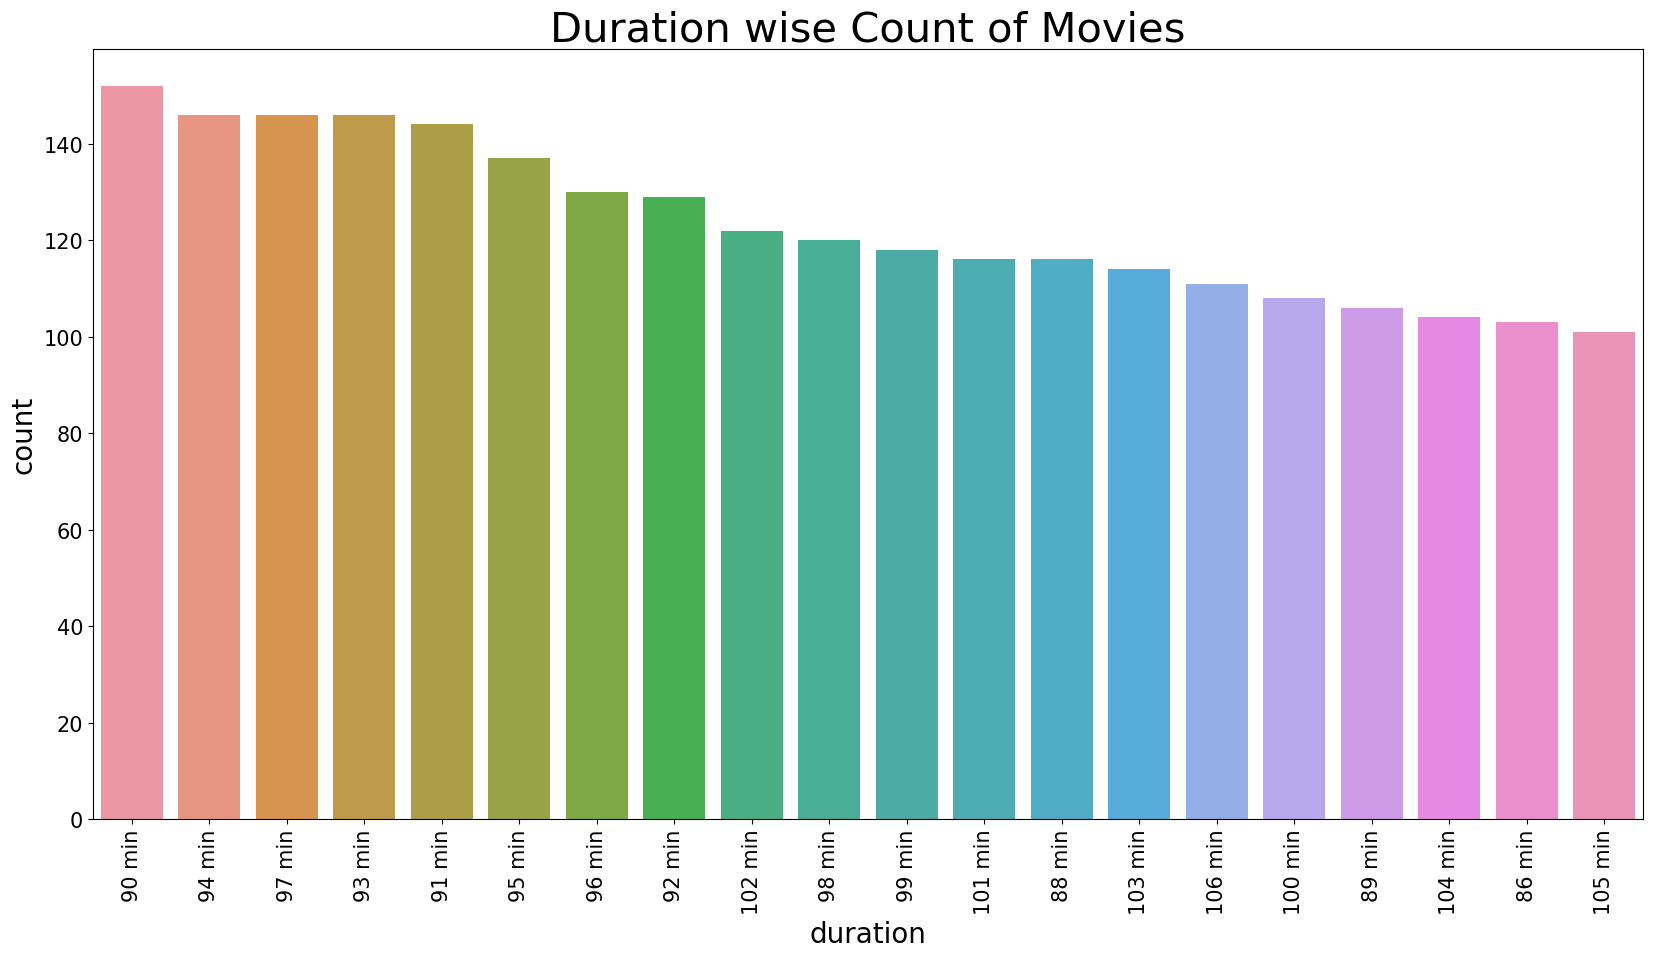

In [128]:
onlymovie=netflix[netflix['type']=="Movie"]
#onlymovie['duration'] = onlymovie['duration'].str.replace('min','')
#onlymovie['duration'] = pd.to_numeric(onlymovie['duration']) 
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Duration wise Count of Movies", fontsize=30)
plt.xlabel("duration",fontsize=20)
plt.ylabel("count",fontsize=20)
sns.countplot(ax=ax, x='duration',data=onlymovie,order=pd.value_counts(onlymovie['duration']).iloc[:20].index)
plt.show()
#plt.gca().invert_xaxis()
#onlymovie.duration.value_counts().plot(kind='bar',figsize=(30,5))

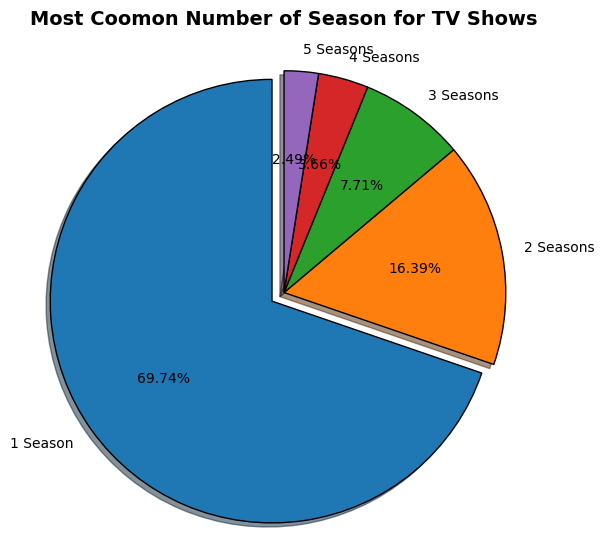

In [140]:
onlytv=netflix[netflix['type']=="TV Show"]
topcountry=onlytv.duration.value_counts()[:5]
plt.pie(topcountry, labels = topcountry.index, radius=1.5, autopct='%2.2f%%', startangle=90, shadow=True, textprops={"fontsize":10}, wedgeprops={"edgecolor":"black"},explode=[0.1,0,0,0,0])
plt.title("Most Coomon Number of Season for TV Shows",fontdict = {'size' : '14', 'fontweight' : 'bold'},pad =60)
plt.show()